# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Loading the Data

In [ ]:
dataset = pd.read_csv("/content/car_purchasing.csv", encoding='latin-1')
dataset.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
rows, columns = dataset.shape

print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 500
Number of Columns: 9


Checking the Datatype

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
None


Checking the NULL values

In [ ]:
dataset.isnull()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [ ]:
dataset.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [ ]:
dataset.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


Droping Unwanted Columns

In [ ]:
df = dataset.drop(['customer name','customer e-mail'],axis='columns')
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
rows, columns = dataset.shape

print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 500
Number of Columns: 9


Changing the datatype of age column

In [ ]:
df['age'] = df['age'].astype(int)
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
duplicates = df.duplicated().sum()
duplicates

0

In [ ]:
df['country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

Changing country name to numeric

In [ ]:
country_mapping = {country: code for code, country in enumerate(df['country'].unique())}

# Replace country names with numerical codes
df['country_code'] = df['country'].map(country_mapping)

# Drop the original 'country' column if needed
df = df.drop('country', axis=1)
df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_code
0,0,41,62812.09301,11609.380910,238961.2505,35321.45877,0
1,0,40,66646.89292,9572.957136,530973.9078,45115.52566,1
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921,2
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313,3
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248,4
...,...,...,...,...,...,...,...
495,0,41,71942.40291,6995.902524,541670.1016,48901.44342,94
496,1,37,56039.49793,12301.456790,360419.0988,31491.41457,124
497,1,53,68888.77805,10611.606860,764531.3203,64147.28888,160
498,1,59,49811.99062,14013.034510,337826.6382,45442.15353,31


In [ ]:
df['country_code'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
X = df[['gender', 'age', 'annual Salary', 'credit card debt', 'net worth']]
y = df['car purchase amount']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Understanding the relationship between columns

Text(0, 0.5, 'Car Purchase Amount')

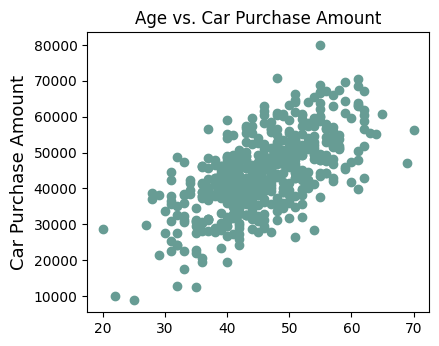

In [ ]:
# Scatterplot of 'age' vs. 'car purchase amount'
plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.scatter(df['age'], df['car purchase amount'], color='#679C94')
plt.title('Age vs. Car Purchase Amount')
plt.ylabel('Car Purchase Amount', size=13)

Text(0, 0.5, 'Car Purchase Amount')

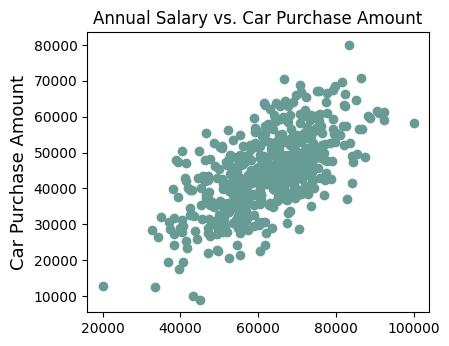

In [ ]:
# Chart 2: Scatterplot of 'annual Salary' vs. 'car purchase amount'
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 2)
plt.scatter(df['annual Salary'], df['car purchase amount'], color='#679C94')
plt.title('Annual Salary vs. Car Purchase Amount')
plt.ylabel('Car Purchase Amount', size=13)

Text(0, 0.5, 'Count')

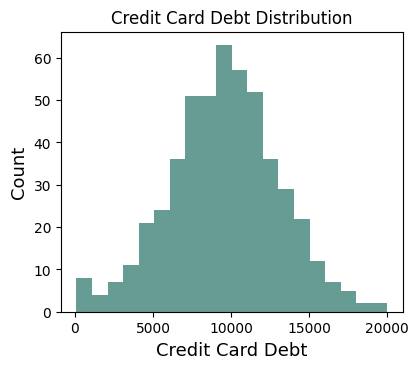

In [ ]:
# Chart 3: Histogram of 'credit card debt'
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 3)
df['credit card debt'].plot(kind='hist', bins=20, color='#679C94')
plt.title('Credit Card Debt Distribution')
plt.xlabel('Credit Card Debt', size=13)
plt.ylabel('Count', size=13)

Text(0, 0.5, 'Car Purchase Amount')

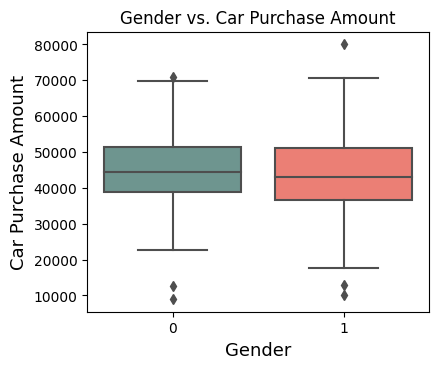

In [ ]:
# Chart 4: Boxplot of 'gender' vs. 'car purchase amount'
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 4)
sns.boxplot(x='gender', y='car purchase amount', data=df, palette=['#679C94', '#FF6F61'])
plt.title('Gender vs. Car Purchase Amount')
plt.xlabel('Gender', size=13)
plt.ylabel('Car Purchase Amount', size=13)

Text(0.5, 1.0, 'Correlation Heatmap')

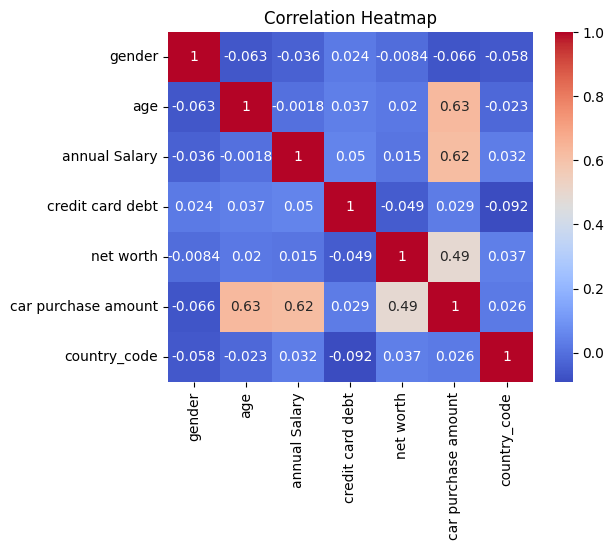

In [ ]:
# Chart 5: Correlation Heatmap
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 5)
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Test Train Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Model Building

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [ ]:
# Fit each model, make predictions, and calculate R-squared (accuracy)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} R-squared: {r2}')

Linear Regression R-squared: 0.9994363311119524
Random Forest Regressor R-squared: 0.9475480417541149
Decision Tree Regressor R-squared: 0.8692990159672842
K-Nearest Neighbors R-squared: 0.8929784991362003


In [ ]:
# Results from model building
model_names = list(models.keys())
r2_scores = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

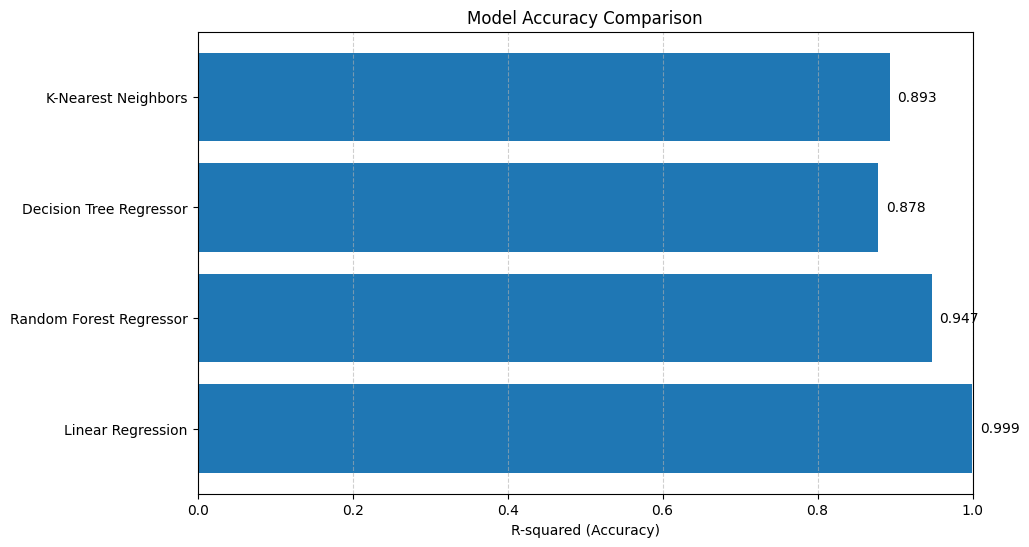

In [ ]:
# Create a bar chart to compare R-squared (accuracy) of each model
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_scores)
plt.xlabel('R-squared (Accuracy)')
plt.title('Model Accuracy Comparison')
plt.xlim(0.0, 1.0)  # Set the x-axis range from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate the bar chart with R-squared values
for i, score in enumerate(r2_scores):
    plt.text(score + 0.01, i, f'{score:.3f}', va='center')

plt.show()